# CS 533 Project - TVCA analysis
by Abishai Joy and Ravishankar

## Purpose and Context
The purpose of this assignment is to perform an exploratory analysis on [TVCA](http://www.biketreasurevalley.org/) data

- Obtain TVCA data from Mike Stefancic
- Set up a Jupyter notebook and data set to begin a new analysis
- Carry out an exploratory analysis to understand a data set’s contents and communicate them to others.


## Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

'''
Note: You may need to install simpledf usin `pip` because the conda installation is not 
      supported for python versions >3.4
'''
from simpledbf import Dbf5 

## Loading Data

All binary files are in the `bin/` folder

In [3]:
bike_count = pd.ExcelFile('bin/bike-count-master-summary-updated-2019.xlsx')

The excel file has multiple sheets with different headers and data.

Let us first take a look at the number of sheets and what they are called

In [4]:
print("# of sheets: ", len(bike_count.sheet_names))
bike_count.sheet_names

# of sheets:  22


['Overall',
 'ACHD',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012-May',
 '2012-September',
 '2013-May',
 '2013-September',
 '2014-May',
 '2014-September',
 '2015-May JUB',
 '2015 - Sept',
 '2016- May',
 '2016- Sept',
 'NO counts -2017 - May',
 'NO counts 2017 - Sept',
 '2018 - May',
 '2018 - Sept',
 '2019 - May']

The excel file has 22 different sheets, so we save each sheet as a pandas data frame

The first sheet is called **Overall** and contains summaries of bike counts acrosse various intersection in Boise from 2007 to 2019 with some missing data for some years

In [5]:
data_overall = pd.read_excel(bike_count,'Overall')
data_overall.head()

,Location,2007,2008,2009,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-05-01 00:00:00,2019-05-01 00:00:00,Unnamed: 14,Total,Average
0,03rd / Bannock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,52,52
1,03rd / Myrtle,NaN,NaN,NaN,NaN,151.0,NaN,NaN,59.0,150.0,95.0,133.0,NaN,NaN,NaN,588,117.6
2,05th / Idaho,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,28
3,06th / O'Farrell,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,62
4,06th / Union,NaN,NaN,NaN,NaN,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,137


According to our service learning advisor Mike Stefancic, we are only intereseted in the data from 2010 onwards so we drop the `2007`, `2008` and `2009` columns from the `data_overall` data frame.  

In [6]:
# Make col names a string
data_overall.columns = data_overall.columns.map(str)

data_overall.drop(columns=['2007', '2008', '2009'], inplace=True)
data_overall.head()

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-05-01 00:00:00,2019-05-01 00:00:00,Unnamed: 14,Total,Average
0,03rd / Bannock,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,52,52
1,03rd / Myrtle,NaN,151.0,NaN,NaN,59.0,150.0,95.0,133.0,NaN,NaN,NaN,588,117.6
2,05th / Idaho,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,28
3,06th / O'Farrell,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,62
4,06th / Union,NaN,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,137


Cleanup the columns

In [7]:
data_overall.drop(columns=['Unnamed: 14'], inplace=True)
data_overall.rename(columns={"2015-05-01 00:00:00": "2015-May", '2019-05-01 00:00:00':'2019-May'}, inplace=True)
data_overall.head()

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average
0,03rd / Bannock,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,52,52
1,03rd / Myrtle,NaN,151.0,NaN,NaN,59.0,150.0,95.0,133.0,NaN,NaN,588,117.6
2,05th / Idaho,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,28,28
3,06th / O'Farrell,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,62,62
4,06th / Union,NaN,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,137,137


For the time being, we assign 0 to any missing values. Mike is working on getting the rest of the data filled

In [8]:
data_overall.fillna(0, inplace=True)
data_overall.head()

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average
0,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52,52
1,03rd / Myrtle,0.0,151.0,0.0,0.0,59.0,150.0,95.0,133.0,0.0,0.0,588,117.6
2,05th / Idaho,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,28,28
3,06th / O'Farrell,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,62,62
4,06th / Union,0.0,0.0,0.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,137,137


The second sheet is called **ACHD** and is empty so we ignore it.

The third sheet is called **2007** and contains bike counts across various intersection in Boise in 2007. 
- The data is split by gender and further by whether the bike was on a stree or a side walk. 
- Data is also vailable on how many bikers were wearing helmets and how many weren't. 

In [9]:
data_2007 = pd.read_excel(bike_count,'2007')
data_2007.head()

,Location,Date,Time,Total,Men,On Street,On Sidewalk,With Helmets,Without Helmets,Women,On Street.1,On Sidewalk.1,With Helmets.1,Without Helmets.1,Volunteer Name
0,8th / Fort,2007-05-08,AM,82.0,48.0,31.0,17.0,28.0,23.0,34.0,11.0,22.0,16.0,18.0,K Lundstrom
1,10th / Bannock,2007-05-10,AM,69.0,49.0,43.0,6.0,30.0,19.0,20.0,16.0,4.0,7.0,13.0,K Lundstrom
2,13th / Fort,2007-04-24,AM,51.0,35.0,23.0,12.0,27.0,8.0,16.0,7.0,9.0,10.0,6.0,M Andrew Tripp
3,23rd / State,2007-05-01,AM,18.0,6.0,2.0,4.0,3.0,3.0,12.0,0.0,12.0,8.0,4.0,M Andrew Tripp
4,27th / State,2007-05-09,PM,34.0,26.0,8.0,18.0,9.0,17.0,8.0,1.0,7.0,4.0,4.0,K Lundstrom


The fourth sheet is called **2008** and contains bike counts across various intersection in Boise in 2008. 
- The data is split by gender and further by whether the bike was on a street or a side walk. 
- Data is also vailable on how many bikers were wearing helmets and how many weren't. 

In [10]:
data_2008 = pd.read_excel(bike_count,'2008')
data_2008.head()

,Location,Date,Time,Total,Men,On Street,On Sidewalk,With Helmets,Without Helmets,Women,On Street.1,On Sidewalk.1,With Helmets.1,Without Helmets.1,Volunteer Name
0,8th / Fort,2008-09-23,PM,150.0,101.0,55.0,46.0,36.0,65.0,49.0,26.0,23.0,23.0,26.0,Steve Dunlop
1,10th / Bannock,2008-09-24,PM,174.0,116.0,107.0,9.0,39.0,77.0,58.0,45.0,13.0,22.0,36.0,Krista Broderick
2,13th / Fort,2008-09-23,PM,135.0,87.0,58.0,29.0,47.0,40.0,48.0,24.0,24.0,21.0,27.0,Walt Sledzieski
3,36th / Hill / Catalpa,2008-09-23,AM,46.0,32.0,20.0,12.0,21.0,11.0,14.0,8.0,6.0,10.0,4.0,Al Kristal
4,36th / Hill / Catalpa,2008-09-24,PM,50.0,46.0,39.0,7.0,37.0,9.0,4.0,3.0,1.0,3.0,1.0,Amar


In [11]:
data_2010 = pd.read_excel(bike_count,'2010')
data_2010.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,08th / Bannock,2010-09-16,AM,131.0,55.0,76.0,33.0,15.0,22.0,61.0,David Peckham
1,08th / Bannock,2010-09-14,PM,267.0,133.0,134.0,25.0,51.0,108.0,83.0,Tacy Hitchcock
2,08th / Fort,2010-09-15,PM,132.0,72.0,60.0,22.0,35.0,50.0,25.0,Cindy Ritchie
3,08th / Greenbelt,2010-09-14,PM,270.0,64.0,206.0,64.0,127.0,0.0,79.0,Mark Ritchie
4,08th / River,2010-09-15,AM,114.0,93.0,21.0,62.0,7.0,31.0,14.0,David Peckham


In [12]:
data_2011 = pd.read_excel(bike_count,'2011')
data_2011.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,03rd / Myrtle,2011-09-14,PM,151.0,110.0,41.0,52.0,23.0,58.0,18.0,Justin Lucas
1,08th / Bannock,2011-09-15,AM,115.0,44.0,71.0,26.0,28.0,18.0,43.0,Dave Fostch
2,08th / Greenbelt S,2011-09-13,PM,346.0,61.0,285.0,61.0,182.0,0.0,103.0,Amy Stahl
3,08th / River,2011-09-13,PM,249.0,203.0,46.0,104.0,35.0,99.0,11.0,Mark Ritchie
4,28th / Sunset,2011-09-14,AM,23.0,9.0,14.0,4.0,7.0,5.0,7.0,Sarah Lunstrum


In [13]:
data_2012_may = pd.read_excel(bike_count,'2012-May')
data_2012_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,08th / Bannock,2012-05-16,AM,148.0,56.0,92.0,19.0,29.0,37.0,63.0,Jim Pace
1,08th / Franklin,2012-05-17,AM,61.0,28.0,33.0,19.0,3.0,9.0,30.0,Andy Query
2,08th / River,2012-05-16,AM,115.0,93.0,22.0,42.0,13.0,51.0,9.0,Dan Conlin
3,10th /Bannock,2012-05-16,PM,185.0,60.0,125.0,27.0,80.0,33.0,45.0,Naala Figuroas
4,10th / Franklin,2012-05-15,AM,113.0,32.0,81.0,28.0,10.0,4.0,71.0,Andy Query


In [14]:
data_2012_sept = pd.read_excel(bike_count,'2012-September')
data_2012_sept.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,05th / Idaho,2012-09-13,AM,28.0,13.0,15.0,4.0,12.0,9.0,3.0,Jim Pace
1,06th / O'Farrell,2012-09-13,PM,62.0,45.0,17.0,11.0,8.0,34.0,9.0,Vicki Trees
2,06th / Union,2012-09-11,PM,127.0,83.0,44.0,31.0,14.0,52.0,30.0,Naala Figueras
3,06th / Union,2012-09-12,AM,46.0,23.0,23.0,18.0,9.0,5.0,14.0,Naala Figueras
4,06th / Union,2012-09-15,PM,137.0,110.0,27.0,25.0,7.0,85.0,20.0,Vicki Trees


In [15]:
data_2013_may = pd.read_excel(bike_count,'2013-May')
data_2013_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,03rd / Myrtle,2013-05-07,AM,59.0,51.0,8.0,17.0,2.0,34.0,6.0,Tony Grange
1,08th / Bannock,2013-05-09,AM,149.0,50.0,99.0,15.0,25.0,35.0,74.0,Jim Pace
2,08th / Fort,2013-05-09,PM,143.0,89.0,54.0,16.0,35.0,73.0,19.0,Robert Moore
3,08th / N Greenbelt,2013-05-07,AM,200.0,74.0,126.0,56.0,44.0,18.0,82.0,Matt Bergstrom
4,08th / River,2013-05-08,AM,123.0,114.0,9.0,54.0,7.0,60.0,2.0,Mark Ritchie


In [16]:
data_2013_sept = pd.read_excel(bike_count,'2013-September')
data_2013_sept.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,03rd / Bannock,2013-09-10,AM,52.0,21.0,31.0,5.0,13.0,16.0,18.0,Andy Query
1,03rd / Myrtle,2013-09-10,PM,150.0,120.0,30.0,58.0,16.0,62.0,14.0,Kathleen Coskey
2,07th / Brumback,2013-09-11,AM,24.0,4.0,20.0,2.0,16.0,2.0,4.0,Kay Hummel
3,08th / Bannock,2013-09-10,AM,165.0,62.0,103.0,27.0,31.0,35.0,72.0,Jim Pace
4,08th / Bannock,2013-09-11,AM,149.0,68.0,81.0,28.0,24.0,40.0,57.0,Jim Pace


In [17]:
data_2014_may = pd.read_excel(bike_count,'2014-May')
data_2014_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,03rd / Myrtle,2014-05-08,AM,95.0,84.0,11.0,26.0,3.0,58.0,8.0,Marcus Orton
1,08th / Bannock,2014-05-07,AM,111.0,36.0,75.0,14.0,28.0,22.0,47.0,Jim Pace
2,08th / Bannock,2014-05-07,PM,234.0,116.0,118.0,35.0,62.0,81.0,56.0,Vicki Trees
3,08th / Fort,2014-05-07,PM,109.0,67.0,42.0,6.0,28.0,61.0,14.0,Karry Fischer
4,08th / Main,2014-05-08,PM,276.0,175.0,101.0,75.0,20.0,100.0,81.0,Gracie Bingham


In [18]:
data_2014_sept = pd.read_excel(bike_count,'2014-September')
data_2014_sept.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,03rd / Myrtle,2014-09-10,PM,133.0,105.0,28.0,46.0,14.0,59.0,14.0,Jean Cardeno
1,03rd / Myrtle,2014-09-11,AM,87.0,72.0,15.0,33.0,6.0,39.0,9.0,Kelly Paananen
2,08th / Bannock,2014-09-10,AM,201.0,41.0,160.0,11.0,36.0,30.0,124.0,Jim Pace
3,08th / Bannock,2014-09-11,PM,306.0,145.0,161.0,35.0,61.0,110.0,100.0,Jim Pace
4,08th / Brumback,2014-09-11,AM,30.0,19.0,11.0,12.0,10.0,7.0,1.0,Kristin Little


In [19]:
data_2015_may_jub = pd.read_excel(bike_count,'2015-May JUB')
data_2015_may_jub.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,36th / Taft,2015-05-27,AM,22.0,13.0,9.0,10.0,5.0,3.0,4.0,Michael Van Lydegraf
1,Bogart / Caswell,2015-05-27,PM,8.0,6.0,2.0,3.0,0.0,3.0,2.0,Kristi Watkins
2,Bogart / State,2015-05-27,AM,6.0,3.0,3.0,2.0,1.0,1.0,2.0,Kristi Watkins
3,Collister / State,2015-05-28,AM,17.0,8.0,9.0,8.0,3.0,0.0,6.0,Michael Van Lydegraf
4,Gary / Gillis,2015-05-27,PM,29.0,19.0,10.0,10.0,3.0,9.0,7.0,Travis Jeffers


In [20]:
data_2016_may = pd.read_excel(bike_count,'2016- May')
data_2016_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name,Unnamed: 11
0,Bown/Parkcenter,2016-05-11,AM,36,11,25.0,0,22.0,11.0,3.0,Steve Dunlap,NaN
1,Beacon/Boise,2016-05-11,AM,94,46,48.0,11,34.0,35.0,14.0,Bryan Wilkins,NaN
2,27th/State,2016-05-12,PM,53,23,30.0,6,13.0,17.0,17.0,Jean Coadeño,NaN
3,Veterans Memorial/Chinden,2016-05-11,PM,62,36,26.0,15,16.0,21.0,10.0,Robert McGarvey,NaN
4,Hill/Horseshoe Bend,2016-05-11,AM,18,7,11.0,7,7.0,0.0,4.0,Ailen Fry,NaN


In [21]:
data_2018_may = pd.read_excel(bike_count,'2018 - May')
data_2018_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,Federal/Protest/Kootenia,2018-05-09,am,66.0,24.0,42.0,5.0,17.0,19.0,25.0,Janell Ruthe
1,10th and Franklin/Boise High,2018-05-09,am,148.0,54.0,94.0,43.0,10.0,11.0,84.0,Joanie Fauci
2,Garden St/Franklin Rd,2019-05-10,PM,33.0,20.0,13.0,10.0,4.0,10.0,9.0,Christa Howarth
3,27th/State St,2018-05-09,PM,45.0,31.0,14.0,11.0,9.0,20.0,5.0,Lisa Ozuna
4,10th/Bannock,2018-05-01,PM,206.0,74.0,132.0,26.0,69.0,48.0,63.0,Kelly Frazier


In [22]:
data_2019_may = pd.read_excel(bike_count,'2019 - May')
data_2019_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,8th/Bannock,2019-05-07,AM,130.0,32,98.0,13.0,27.0,19.0,71.0,Brian Wilkens
1,8th/fort,2019-05-07,AM,43.0,26,17.0,14.0,10.0,12.0,7.0,April Fredrickson
2,8th/river,2019-05-07,PM,282.0,239,43.0,169.0,30.0,70.0,13.0,Clancy Anderson
3,Anne frank/greenbelt,2019-05-08,AM,156.0,4,152.0,4.0,63.0,0.0,89.0,Kristen Little
4,Latah/Kootani,2019-05-07,PM,34.0,23,11.0,11.0,6.0,12.0,5.0,Greg Little


Loading the **dbf files**

In [23]:
bike_dbf = Dbf5('bike.dbf')
funclass_dbf = Dbf5('Funclass.dbf')
ACHD_dbf = Dbf5('ACHD Traffic Counts.dbf')

In [25]:
funclass_DF = funclass_dbf.to_dataframe()
funclass_DF.head()

,OBJECTID,STREET_NAM,Agency,County,Miles,Shape_Leng,Location,Street_Org,Street_New,Prop_Org,Prop_New,Requestor,Contact,Justify,Area_of_Im,Arterial_O,Duplicate_,Shape_Le_1,Shape_STLe
0,0,Beacon Light Rd,Ada County HD,Ada,0.370975,1958.748362,E from Brandon,PROP MINOR ARTERIAL,PROP MINOR ARTERIAL,Y,Y,NaN,NaN,NaN,Star,NaN,NaN,1958.748435,1958.748210
1,389,Cloverdale Rd,Ada County HD,Ada,0.508788,2686.401708,Vallejo to Hubbard,MINOR ARTERIAL,MINOR ARTERIAL,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,2686.402212,2686.402213
2,1310,Overland (Realignment),Ada County HD,Ada,0.658897,3478.974441,e/o of Ten Mile to ex. Overland,PRINCIPAL ARTERIAL,PRINCIPAL ARTERIAL,NaN,NaN,ACHD,Justin Lucas,Reflects new alignment.,Meridian,NaN,NaN,3478.974568,3478.974500
3,1373,Linder Rd,Ada County HD,Ada,0.111780,590.199242,North of Overland,MINOR ARTERIAL,PRINCIPAL ARTERIAL,NaN,NaN,ACHD,Justin Lucas,None given.,Meridian,NaN,NaN,590.199051,590.198730
4,1313,Black Cat,Ada County HD,Ada,2.330630,12305.702559,I84 to Amity,MINOR ARTERIAL,MINOR ARTERIAL,NaN,NaN,NaN,NaN,NaN,Meridian,NaN,NaN,9271.430631,9271.430611


In [26]:
ACHD_DF = ACHD_dbf.to_dataframe()
ACHD_DF

,GisData_SD,Shape_STLe,TrafficCou,TrafficC_1,TrafficC_2,TrafficC_3,TrafficC_4,TrafficC_5,TrafficC_6,TrafficC_7,TrafficC_8,TrafficC_9,Traffic_10,Traffic_11,Traffic_12,Traffic_13,Traffic_14,Traffic_15,Traffic_16
0,6189,330.413812,785,6189,HAINES ST,41,11/18/08,NORTH OF SHENANDOAH DR,Boise,ITD Count,NaN,0,0,NB,0,0,SB,SHENANDOAH DR,N END
1,6188,720.403299,256,6188,BOGART LN,198,02/17/09,SOUTH OF HILL RD,Ada County,Approach & Total,NaN,9,7,NB,4,8,SB,HILL RD PKWY,HILL RD
2,6187,1167.028511,705,6187,GANDER DR,610,08/09/12,EAST OF LINDER RD,Meridian,Classification,NaN,8,29,EB,36,11,WB,LINDER RD,WALTMAN DR
3,6186,1642.665999,360,6186,CASTLE HILL WAY,821,11/15/18,NORTH OF CASTLE DR,Boise,Approach & Total,ITD Count,0,0,NB,0,0,SB,CASTLE DR,TURRET WY
4,6185,203.590987,1366,6185,PEPPERMINT DR,533,11/19/15,WEST OF CLOVERDALE RD,Boise,Approach & Total,NaN,19,13,EB,5,28,WB,CLOVERDALE RD,SCRANTON WY
5,6184,1394.319835,1339,6184,PASADENA DR,191,09/23/08,EAST OF OWYHEE ST,Boise,ITD Count,NaN,0,0,EB,0,0,WB,OWYHEE ST,EAST END
6,6183,545.924648,1761,6183,SWAINSON AVE,199,11/11/08,NORTH OF GEMSTONE DR,Meridian,Classification,NaN,1,16,NB,13,10,SB,GEMSTONE DR,KANDICE ST
7,6182,2525.877188,1260,6182,NORMANDIE DR,554,09/25/14,EAST OF SARAZEN WY,Boise,Approach & Total,NaN,9,31,EB,22,17,WB,ROOSEVELT ST,PASADENA DR
8,6181,1141.977527,285,6181,BROAD ST,525,10/21/15,EAST OF 04TH ST,Boise,Approach & Total,NaN,26,16,EB,23,34,WB,5TH ST,2ND ST
9,6180,2386.925280,2001,6180,YOSEMITE DR,320,10/23/08,WEST OF BRYCE CANYON AVE,Meridian,Classification,NaN,27,13,EB,22,15,WB,MCKINLEY PARK AVE,ALEXIS WY


In [27]:
ACHD_DF[ACHD_DF['TrafficC_2']=='08TH ST']

,GisData_SD,Shape_STLe,TrafficCou,TrafficC_1,TrafficC_2,TrafficC_3,TrafficC_4,TrafficC_5,TrafficC_6,TrafficC_7,TrafficC_8,TrafficC_9,Traffic_10,Traffic_11,Traffic_12,Traffic_13,Traffic_14,Traffic_15,Traffic_16
219,5963,1819.863830,26,5963,08TH ST,253,10/12/04,WEST OF KNOX ST,Star,Approach & Total,1-Way Street,2,15,EB,0,10,WB,STAR RD,KNOX ST
292,5888,680.360865,26,5888,08TH ST,989,03/09/17,NORTH OF MAIN ST,Boise,Approach & Total,1-Way Street,40,84,NB,0,0,SB,MAIN ST,BANNOCK ST
370,5807,1020.354574,26,5807,08TH ST,1215,12/06/12,SOUTH OF RIVER ST,Boise,Classification,NaN,16,68,NB,31,98,SB,MYRTLE ST,S/O RIVER ST
371,5806,680.194095,26,5806,08TH ST,2097,04/19/18,NORTH OF MYRTLE ST,Boise,Approach & Total,NaN,42,138,NB,17,57,SB,MYRTLE ST,FRONT ST
1290,3465,336.186005,26,3465,08TH ST,5335,04/05/18,NORTH OF HAYS ST,Boise,Approach & Total,1-Way Street,272,554,NB,0,0,SB,HAYS ST,FORT ST
1623,2765,1784.525902,26,2765,08TH ST,5367,04/26/18,NORTH OF FORT ST,Boise,Approach & Total,1-Way Street,106,568,NB,0,0,SB,FORT ST,RESSEGUIE ST
2876,921,339.993429,26,921,08TH ST,2127,06/27/18,NORTH OF BANNOCK ST,Boise,Approach & Total,1-Way Street,60,203,NB,0,0,SB,BANNOCK ST,JEFFERSON ST
2899,896,339.892070,26,896,08TH ST,4959,04/19/18,NORTH OF JEFFERSON ST,Boise,Approach & Total,1-Way Street,222,524,NB,0,0,SB,JEFFERSON ST,STATE ST
2927,845,1019.991384,26,845,08TH ST,6474,04/04/18,NORTH OF STATE ST,Boise,Approach & Total,1-Way Street,507,629,NB,0,0,SB,STATE ST,HAYS ST
3052,623,1617.129015,26,623,08TH ST,4318,04/25/19,NORTH OF SHERMAN ST,Boise,Classification,7 Day Count,84,282,NB,171,119,SB,RESSEGUIE ST,BRUMBACK ST


Let us **concatenate** the files from the year 2010-2019.

In [29]:
count_2010_2019 = pd.concat([data_2010,data_2011,data_2012_may,data_2012_sept,data_2013_may,data_2013_sept,data_2014_sept,
           data_2015_may_jub,data_2016_may,data_2018_may,data_2019_may])
count_2010_2019.head()

C:\Users\Admini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Date,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Location,Time,Total,Total: Location 1,Total: Location 2,Unnamed: 11,Volunteer Name
0,2010-09-16,33,15.0,22.0,61.0,08th / Bannock,AM,131,55,76.0,NaN,David Peckham
1,2010-09-14,25,51.0,108.0,83.0,08th / Bannock,PM,267,133,134.0,NaN,Tacy Hitchcock
2,2010-09-15,22,35.0,50.0,25.0,08th / Fort,PM,132,72,60.0,NaN,Cindy Ritchie
3,2010-09-14,64,127.0,0.0,79.0,08th / Greenbelt,PM,270,64,206.0,NaN,Mark Ritchie
4,2010-09-15,62,7.0,31.0,14.0,08th / River,AM,114,93,21.0,NaN,David Peckham


# Usage Trend

Let us look at the usage trend for a given street year wise using overall data.

In [43]:
data_overall.head()

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average
0,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52,52
1,03rd / Myrtle,0.0,151.0,0.0,0.0,59.0,150.0,95.0,133.0,0.0,0.0,588,117.6
2,05th / Idaho,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,28,28
3,06th / O'Farrell,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,62,62
4,06th / Union,0.0,0.0,0.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,137,137


Let us take only the required data.

In [47]:
time_visualize = data_overall[['Location','2010','2011','2012-May','2012-September','2013-May','2013-September','2014-May',
              '2014-September','2015-May']]
time_visualize.head()

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May
0,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0
1,03rd / Myrtle,0.0,151.0,0.0,0.0,59.0,150.0,95.0,133.0,0.0
2,05th / Idaho,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
3,06th / O'Farrell,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0
4,06th / Union,0.0,0.0,0.0,137.0,0.0,0.0,0.0,0.0,0.0


Using melt function to make a separate date coumn.

In [51]:
time_count = time_visualize.melt(id_vars=["Location"], 
        var_name="Date", 
        value_name="Value")
time_count.head()

,Location,Date,Value
0,03rd / Bannock,2010,0.0
1,03rd / Myrtle,2010,0.0
2,05th / Idaho,2010,0.0
3,06th / O'Farrell,2010,0.0
4,06th / Union,2010,0.0


We need to analyse the pattern hidden in the utilization of streets for cycling over the time.

In [54]:
time_count['Date']= pd.to_datetime(time_count['Date']) 

In [56]:
plt_count = time_count.groupby([pd.Grouper(key='Date', freq='Y'),'Location']).sum()['Value']
plt_count.head()

Date        Location        
2010-12-31  03rd / Bannock      0.0
            03rd / Myrtle       0.0
            05th / Idaho        0.0
            06th / O'Farrell    0.0
            06th / Union        0.0
Name: Value, dtype: float64

Text(0.5, 0, 'Time')

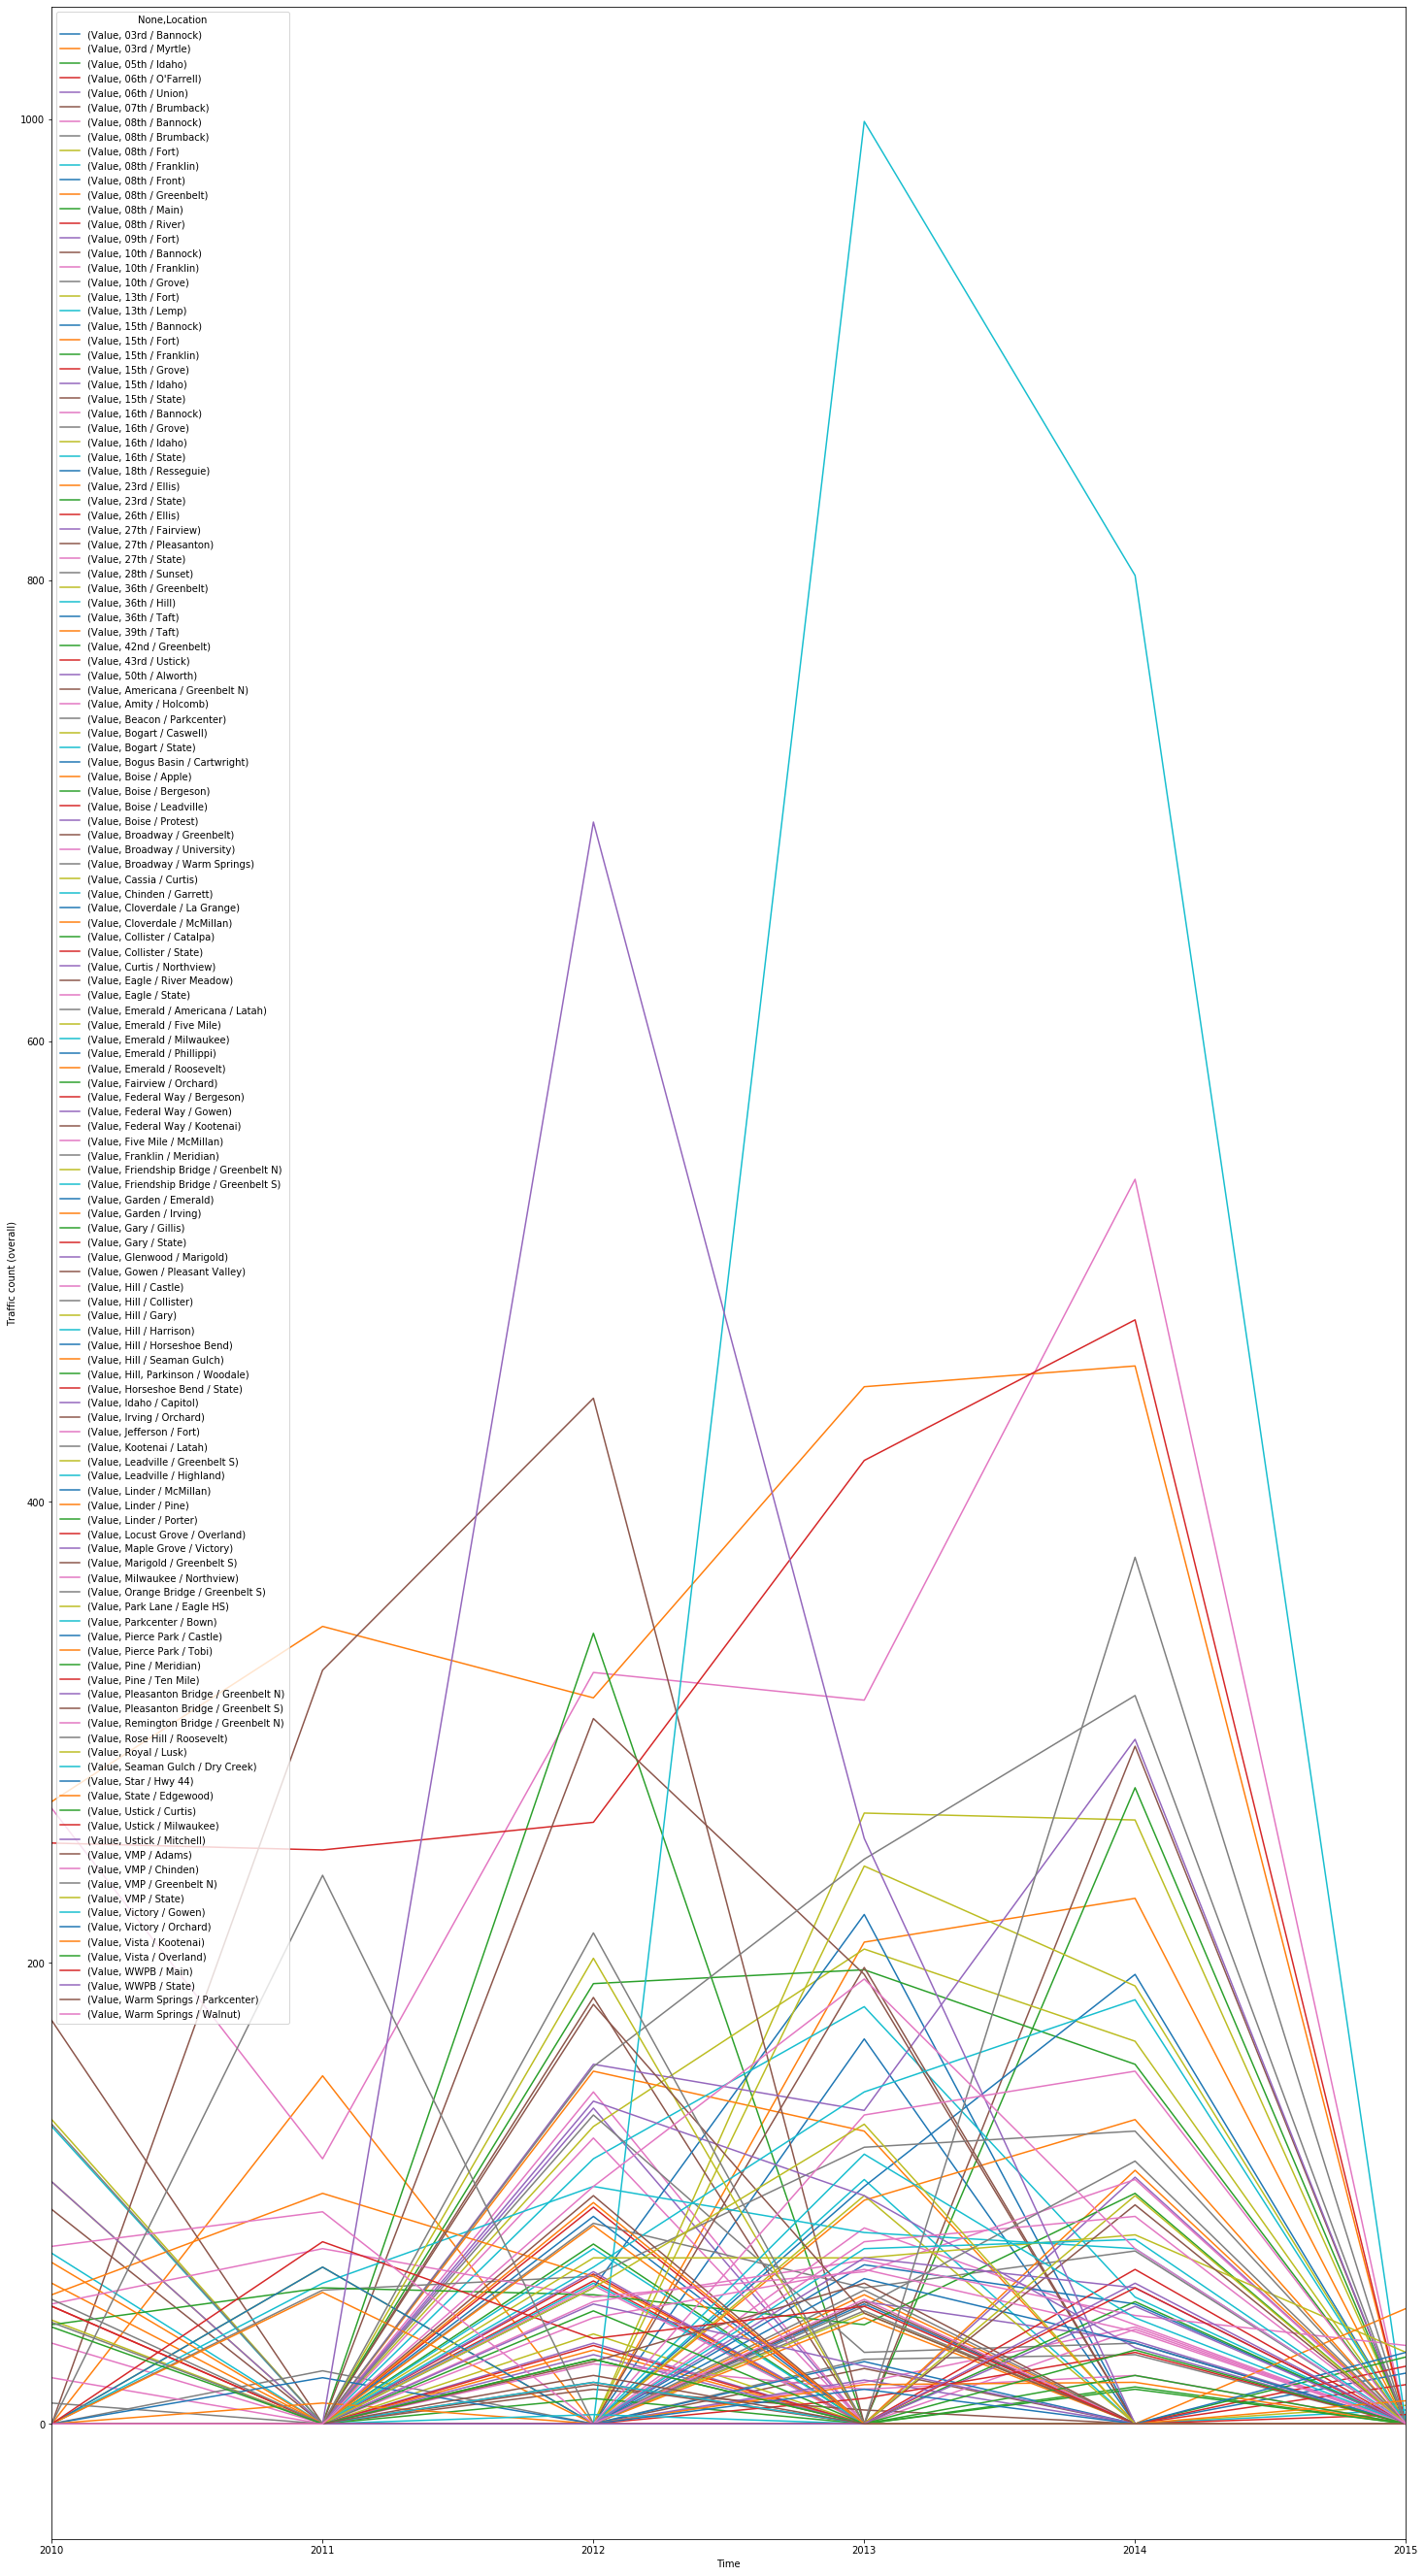

In [75]:
count_traffic= pd.DataFrame(plt_count)

count_traffic.unstack().plot(figsize=(25,48))
plt.ylabel("Traffic count (overall)")
plt.xlabel("Time")

For our **RQ1**. To find the busiest street and the traffic count.
This plot help us realize that Friendship bridge/greenbelt was once heavily used by the cyclists,In 2019 this has reduced and this is am example of a busy street nearby to the greenbelt.

We will be splitting up the streets to further analyse the speed limits and traffic, Currently we are waiting for more information on those data variables.

*Finding the street with maximum traffic.*

In [71]:
Green_count[['Value','Location']].max()

Value                                   593
Location    Friendship Bridge / Greenbelt S
dtype: object

In [67]:
plt_green = Green_count.groupby([pd.Grouper(key='Date', freq='Y'),'Location']).sum()['Value']
plt_green.head()

Date        Location                       
2010-12-31  Friendship Bridge / Greenbelt S      0.0
2011-12-31  Friendship Bridge / Greenbelt S      0.0
2012-12-31  Friendship Bridge / Greenbelt S      0.0
2013-12-31  Friendship Bridge / Greenbelt S    999.0
2014-12-31  Friendship Bridge / Greenbelt S    802.0
Name: Value, dtype: float64

Let us plot and see the traffic pattern in that greenbelt over the years.

Text(0.5, 0, 'Time')

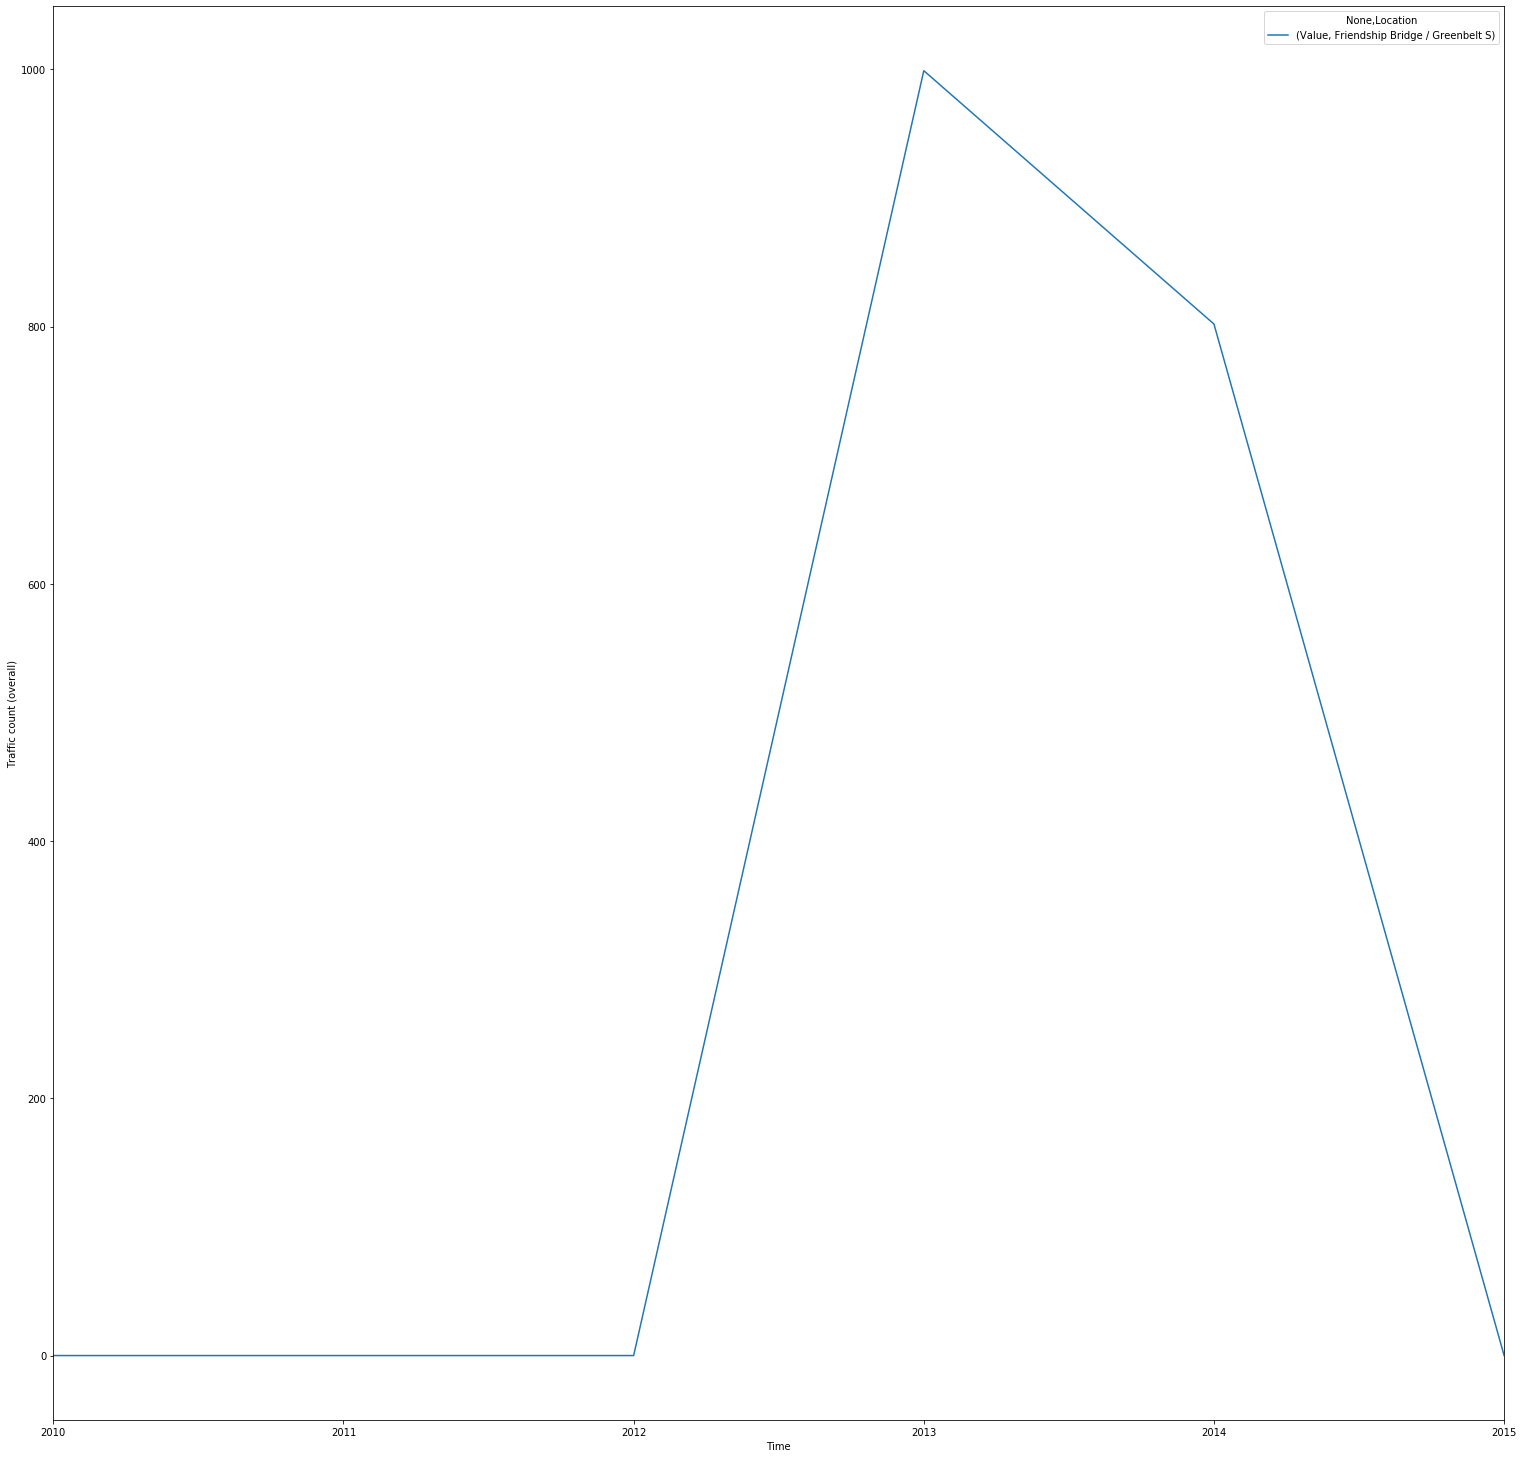

In [72]:
count_traf= pd.DataFrame(plt_green)

count_traf.unstack().plot(figsize=(26,26))
plt.ylabel("Traffic count (overall)")
plt.xlabel("Time")